In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

In [44]:
class double_Pendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
    double pendulums (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    mass1 : float
        mass of the first pendulum
    mass2 : float
        mass of the second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """

    def __init__(self, L1=1., m1=1., L2=1., m2=1., g=1., 
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        
        m1 = self.m1
        m2 = self.m2
        L1 = self.L1
        L2 = self.L2
        g = self.g

        return [y[1], g*L2/(m1*L1)*(-m1*y[0]-m2*y[0]+m2*y[2]), y[3], (m1+m2)/(m1*L2)*g*(y[0]-y[2])]
    
    
    def solve_ode(self, t_pts, phi_1_0=0, phi_1_dot_0=0., phi_2_0=2, phi_2_dot_0=0.,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y

        return phi_1, phi_1_dot, phi_2, phi_2_dot

In [45]:
p1 = double_Pendulum()
t_pts = np.arange(0, 50, 0.001)
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts)

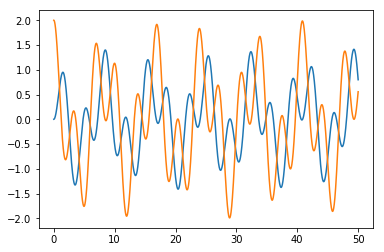

In [46]:
plt.plot(t_pts, phi_1)
plt.plot(t_pts, phi_2)